## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

sns.set()
pd.options.display.max_columns = 999

## Reading in Dataset

In [2]:
data = pd.read_csv("BankChurners.csv")

In [3]:
# View shape of data (rows and columns)
data.shape

(10127, 23)

In [4]:
# View first five rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,90032,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,90033,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,90034,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,90035,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,90036,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data Cleaning

 This part includes but is not limited to: 
   1. Converting incorrect variable datatypes.
   2. Dropping or impuding missing values.
   3. Finding and fixing erroneous data.
   4. Handling outliers.



### Checking for Duplicates

In [5]:
# Checking if we have any unique IDs eg customer IDs
for column in data.columns:
    if data[column].nunique() == data.shape[0]:
       print(column)


CLIENTNUM


In [6]:
# If data shape doesn't change after dropping duplicates then no duplicates
before_shape = data.shape
data.drop_duplicates(inplace=True)
print(before_shape, data.shape)

(10127, 23) (10127, 23)


### Subsetting Data

In [7]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
# We drop the last two columns since they are lengthy and can be derived
data = data[data.columns[:-2]]

### Datatypes

In [9]:
# We check whether dates and numbers have been read as strings and do conversions
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Missing Values

In [10]:
# Get the sum of all null values in each column
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [11]:
# View the missing records for a trend or sanity checks before replacing
data[data['Education_Level'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,90038,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,90043,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,90047,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,90049,Existing Customer,41,M,3,NaN,Married,$80K - $120K,Blue,34,4,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,90055,Existing Customer,47,F,4,NaN,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,100122,Existing Customer,36,F,3,NaN,Married,$40K - $60K,Blue,22,5,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,100126,Existing Customer,59,M,1,NaN,Single,$60K - $80K,Blue,48,3,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,100127,Existing Customer,46,M,3,NaN,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,100150,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [12]:
data[data['Marital_Status'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,90035,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
7,90039,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,90042,Existing Customer,42,M,5,Uneducated,NaN,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,90045,Existing Customer,35,M,3,Graduate,NaN,$60K - $80K,Blue,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
15,90047,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,100102,Existing Customer,47,M,3,High School,NaN,$80K - $120K,Silver,40,5,3,2,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040
10100,100132,Existing Customer,39,M,2,Graduate,NaN,$60K - $80K,Silver,36,4,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10101,100133,Existing Customer,42,M,2,Graduate,NaN,$40K - $60K,Blue,30,3,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
10118,100150,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [13]:
data[data['Income_Category'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,90051,Existing Customer,45,F,2,Graduate,Married,NaN,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
28,90060,Existing Customer,44,F,3,Uneducated,Single,NaN,Blue,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
39,90071,Attrited Customer,66,F,0,Doctorate,Married,NaN,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
44,90076,Existing Customer,38,F,4,Graduate,Single,NaN,Blue,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
58,90090,Existing Customer,44,F,5,Graduate,Married,NaN,Blue,35,4,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,100053,Attrited Customer,30,F,1,Graduate,Married,NaN,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10040,100072,Attrited Customer,50,F,3,Doctorate,Single,NaN,Blue,36,4,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
10083,100115,Existing Customer,42,F,4,Uneducated,Married,NaN,Blue,23,4,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000
10092,100124,Attrited Customer,40,F,3,Graduate,Married,NaN,Blue,25,1,2,3,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273


In [14]:
# Since the columns with missing values are categorical variables we can 
#   replace them with 'Unknown'. If variables are numerical, we can impude
#   or fill in the null values with values like the mean etc.
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [15]:
# Verify that the change has been effected
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Data Transformation: Binning

In [16]:
# View the 'Customer_Age' column min and max for setting bin intervals
print(data['Customer_Age'].max())
print(data['Customer_Age'].min())

73
26


In [17]:
# Create bin intervals and labels
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

In [18]:
# Random verification to see if the bins are correct
data[data['Customer_Age'] == 30].head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins
789,90821,Existing Customer,30,M,2,High School,Married,Less than $40K,Blue,23,4,2,0,2997.0,1393,1604.0,1.120,1577,35,0.522,0.465,30s
803,90835,Existing Customer,30,M,1,High School,Married,$60K - $80K,Blue,17,3,3,2,7906.0,1631,6275.0,0.889,1946,45,0.552,0.206,30s
890,90922,Existing Customer,30,F,0,Graduate,Divorced,Unknown,Blue,13,5,1,2,7772.0,1890,5882.0,0.754,2585,75,0.829,0.243,30s
939,90971,Existing Customer,30,M,1,Graduate,Married,$80K - $120K,Blue,19,5,3,2,9959.0,2377,7582.0,1.100,1560,39,0.696,0.239,30s
974,91006,Existing Customer,30,M,0,Graduate,Unknown,$60K - $80K,Blue,36,3,5,3,18513.0,2517,15996.0,0.524,1567,33,0.941,0.136,30s


## EDA

### Sanity Checks

Verift that 16% of customers are indeed attrited

In [19]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [20]:
attrited_customers_percentage = round((data['Attrition_Flag'].value_counts()['Attrited Customer'] / data.shape[0]), 2) * 100
print(f"{attrited_customers_percentage} % of customers have churned.")

16.0 % of customers have churned.


## Summary Statistics

We are looking to understand:
  1. How many instances are in the dataset (frequency or counts)
  2. A measure of central tendency (mean, median, mode)
  3. The spread of the dataset (variance, standard deviation)

In [21]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,95095.000000,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,90032.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,92563.500000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,95095.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,97626.500000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,100158.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [22]:
avg_total_relationship_count = round(np.mean(data['Total_Relationship_Count']), 2)
median_total_relationship_count = round(np.median(data['Total_Relationship_Count']), 2)

avg_credit_limit = round(np.mean(data['Credit_Limit']), 2)
median_credit_limit = round(np.median(data['Credit_Limit']), 2)

print(f'The average Total_Relationship_Count is {avg_total_relationship_count} and the median is {median_total_relationship_count}')
print(f'The average Credit_Limit is {avg_credit_limit} and the median is {median_credit_limit}')

The average Total_Relationship_Count is 3.81 and the median is 4.0
The average Credit_Limit is 8631.95 and the median is 4549.0


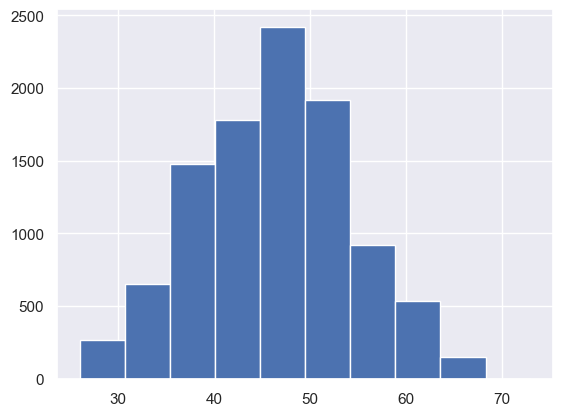

In [23]:
plt.hist(data['Customer_Age']);

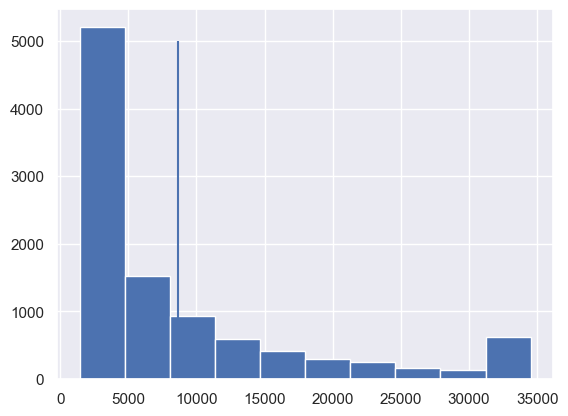

In [24]:
plt.hist(data['Credit_Limit'])
plt.vlines(data['Credit_Limit'].mean(), 0, 5000)
plt.vlines(data['Credit_Limit'].median(), 0, 5000);

Text(0.5, 0, 'Credit Limit')

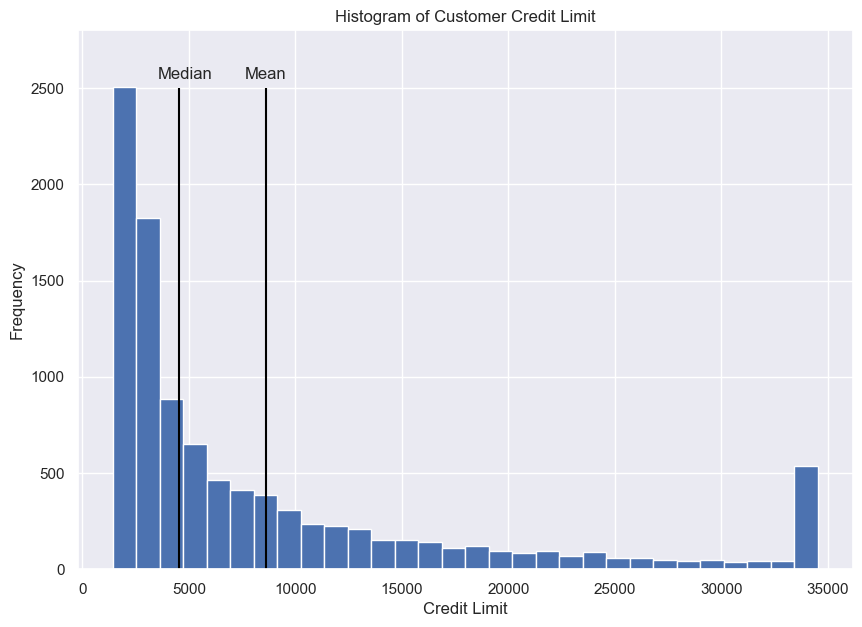

In [25]:
# Leverage more capabilities to get a better view

# We can use the 'Credit_Limit' column to see the skewness of the data
#   'Credit_Limit' is right skewed or positive skewed as seen in the,
#   histogram. The mean is pulled to the right due to outliers (customers with
#   very high credit limit of 35,000).
plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'], bins=30);

plt.vlines(data['Credit_Limit'].mean(), 0, 2500, colors='Black')
plt.vlines(data['Credit_Limit'].median(), 0, 2500, colors='Black')
plt.text(data['Credit_Limit'].mean()-1000, 2500+50, "Mean")
plt.text(data['Credit_Limit'].median()-1000, 2500+50, "Median")
plt.ylim(0, 2800)
plt.title("Histogram of Customer Credit Limit")
plt.ylabel("Frequency")
plt.xlabel("Credit Limit")

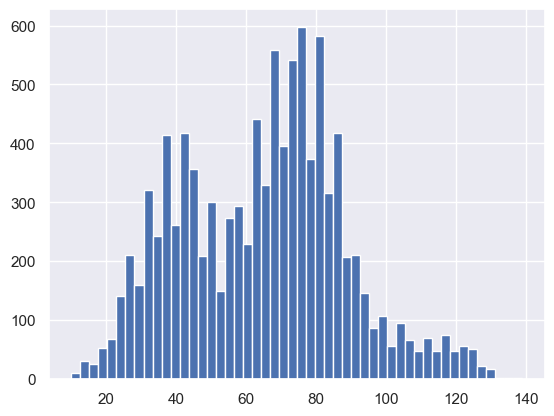

In [26]:
# 'Total_Trans_Ct' shows bimodal data pattern due to the two pits of data
# This might indicate that we have two different groups

plt.hist(data['Total_Trans_Ct'], bins=50);

## Data Transformations: Normalization and Log

1. Normalization (also referred to as min-max scaler).
2. Log transformation: Helps to make the data 'less skewed'.

In [27]:
def normalize(column):
    upper = column.max()
    lower = column.min()

    # For each value in the column, we subtract the min and divide it by (max - min) value
    return (column - lower) / (upper - lower)


In [28]:
# We can use the 'Credit_Limit' which has skewness and verift that the values
# fall between 0 and 1
normalize(data['Credit_Limit'])

0        0.340190
1        0.206112
2        0.059850
3        0.056676
4        0.099091
           ...   
10122    0.077536
10123    0.085819
10124    0.120042
10125    0.116172
10126    0.270566
Name: Credit_Limit, Length: 10127, dtype: float64

In [29]:
# We add new columns for the normalized, and log-transformed 'Credit_Limit' data.
data['Credit_Limit_Normalized'] = normalize(data['Credit_Limit'])
data['Credit_Limit_Log_Transformed'] = np.log(data['Credit_Limit'])


In [30]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins,Credit_Limit_Normalized,Credit_Limit_Log_Transformed
0,90032,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40s,0.340190,9.448648
1,90033,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40s,0.206112,9.018695
2,90034,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50s,0.059850,8.136811
3,90035,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40s,0.056676,8.105609
4,90036,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40s,0.099091,8.458716


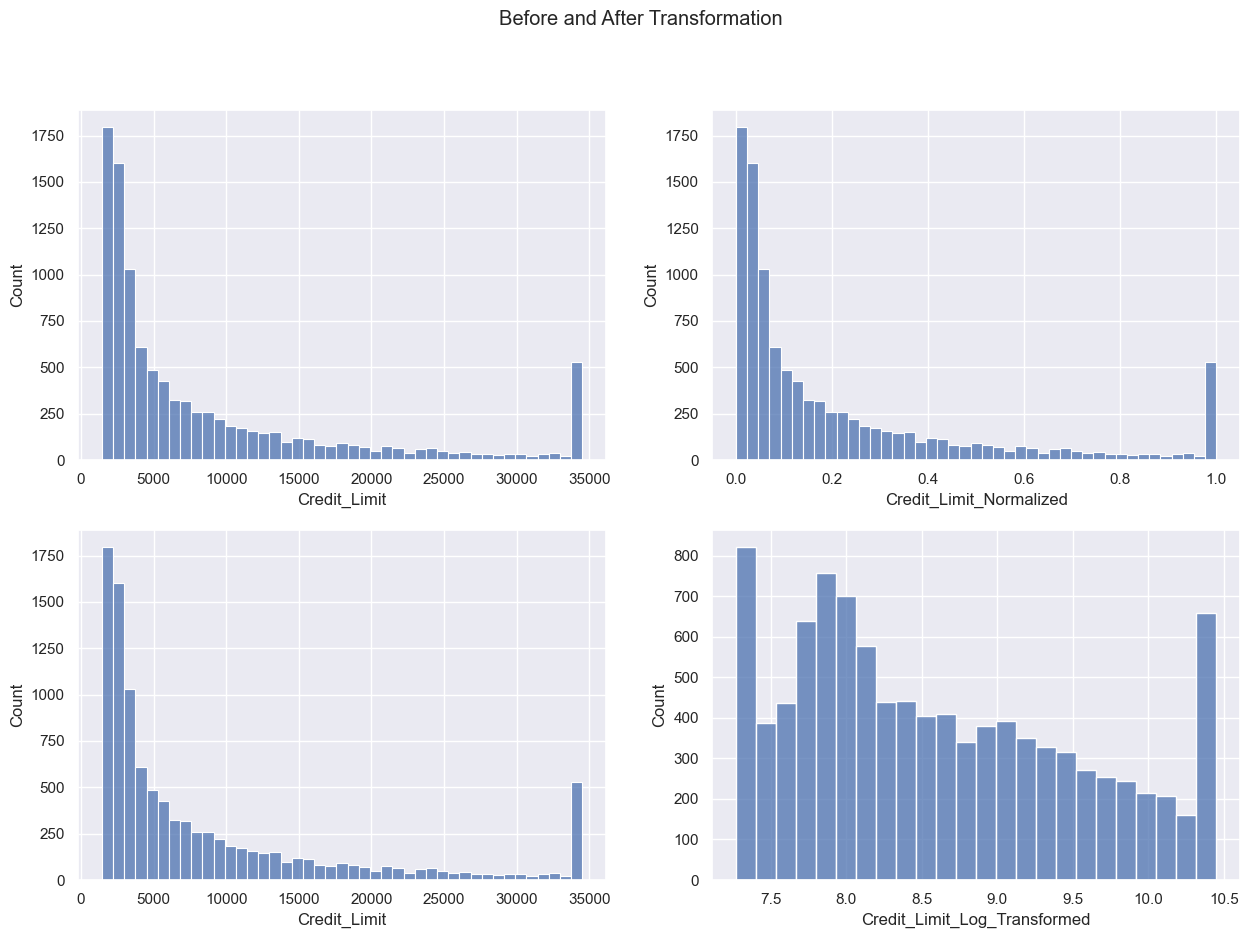

In [31]:
# To see how these transformations impact the variables we are looking at,
# we leverage seaborn subplots and put them side by side
fig, axes = plt.subplots(2, 2, figsize =(15,10))
fig.suptitle('Before and After Transformation')

# Create boxplot in each subplot
sns.histplot(data, x='Credit_Limit', ax=axes[0,0])
sns.histplot(data, x='Credit_Limit_Normalized', ax=axes[0,1])
sns.histplot(data, x='Credit_Limit', ax=axes[1,0])
sns.histplot(data, x='Credit_Limit_Log_Transformed', ax=axes[1,1]);

We can also use the box and whisker plots to find and identify the median, quartiles and any outliers

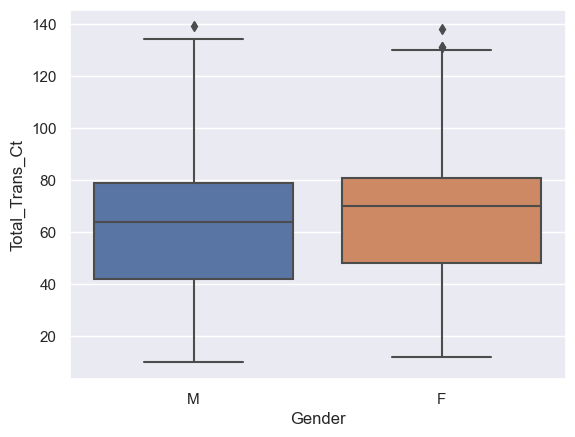

In [32]:
# We can see that the median totol transaction count for females is higher
# Outliers exist in box
sns.boxplot(x=data['Gender'], y=data['Total_Trans_Ct']);

In [33]:
# We can use a pyramid chart to know if there is a difference between distribution of customers
# by age and gender
# Pyramid charts don't come out of the box in matplotlib or seaborn so we use plotly

# To get the data in the format we need, we'll need to aggreagate the data up to the age and group level
pyramid = data.groupby(['Gender', 'Customer_Age_bins'])['CLIENTNUM'].nunique().reset_index()
pyramid

,Gender,Customer_Age_bins,CLIENTNUM
0,F,20s,93
1,F,30s,956
2,F,40s,2410
3,F,50s,1619
4,F,60s,280
5,F,70s,0
6,M,20s,102
7,M,30s,885
8,M,40s,2151
9,M,50s,1379


In [34]:
women_bins = np.array(-1* pyramid[pyramid['Gender']=='F']['CLIENTNUM'])
men_bins = np.array(pyramid[pyramid['Gender']=='M']['CLIENTNUM'])

y = list(range(20, 100, 10))

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-3000, 3000],
                       tickvals=[-2500,-2000,-1500,-1000,-500, 0, 500,1000,1500,2000,2500],
                       ticktext=[2500,2000,1500,1000,500, 0, 500,1000,1500,2000,2500],
                       title='Customers'),
                   barmode='overlay',
                   bargap=0.1)

p_data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
#                text=men_bins.astype('int'),
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=p_data, layout=layout))

## Compraring Categories

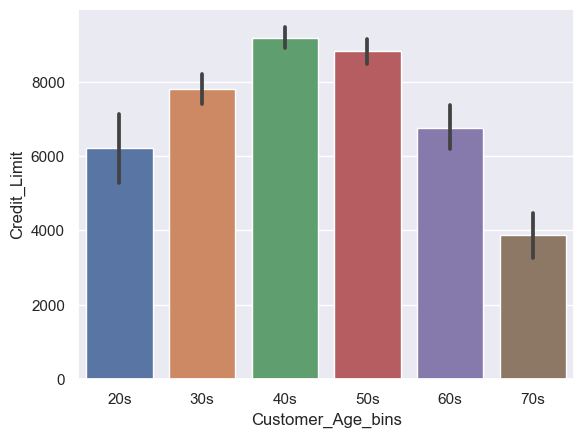

In [35]:
# The error bars show us the confidence interval around the mean.
# Notice the difference in the error bars between the 20s and 40s.
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean);

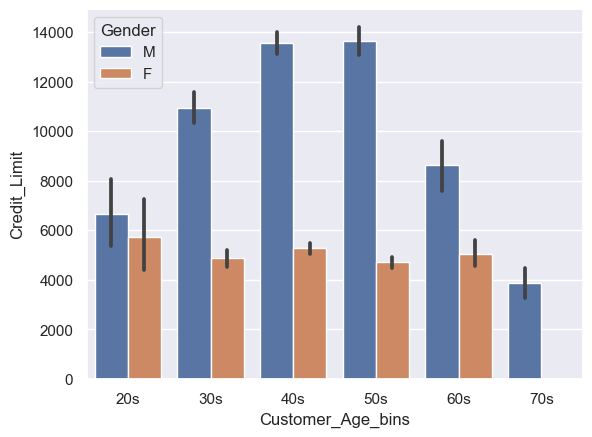

In [36]:
# Let us see what happens when we add in gender, by specifying a hue.
# Notice how females are getting lower credit limits than males.
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.mean);

### **INSIGHT:** *Men on average are getting accepted for higher credit limits than women are*

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



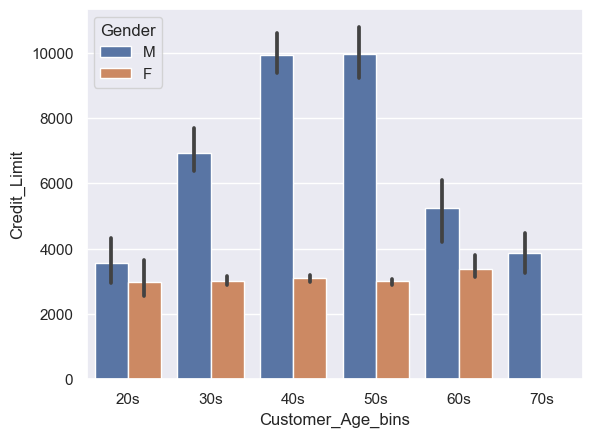

In [37]:
# To sanity check ourselves, let us try with the median instead of the mean
# Note the numpy error. The 70s category has only one customer hence hue will not show.
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, hue='Gender', estimator=np.median);

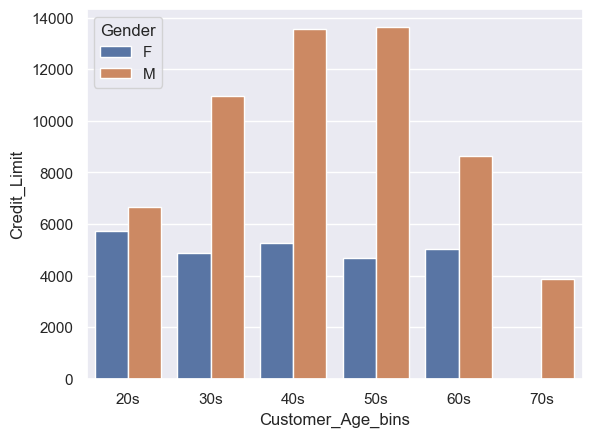

In [38]:
# We can build the bar charts without the error bars by aggregating
barplot = data.groupby(['Customer_Age_bins', 'Gender'])['Credit_Limit'].mean().reset_index()
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=barplot, hue='Gender', estimator=np.mean);

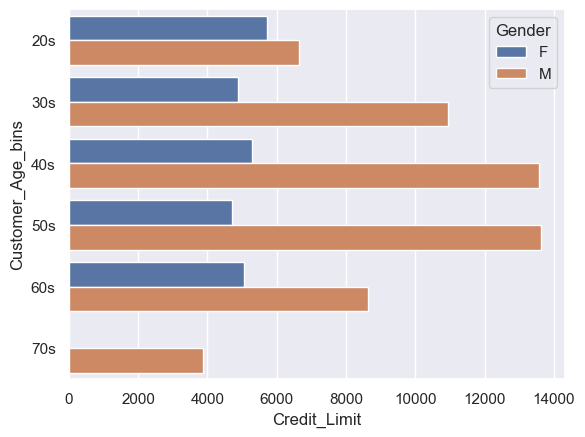

In [39]:
# We can turn the the visuals so the bars go horizontally with one parameter change and swapping x and y
sns.barplot(x='Credit_Limit', y='Customer_Age_bins', data=barplot, hue='Gender', estimator=np.median, orient='h');